This is a demo of opticiq for the purpose of slant edge measurement.

I0 shape (500, 600), type int64, max 325


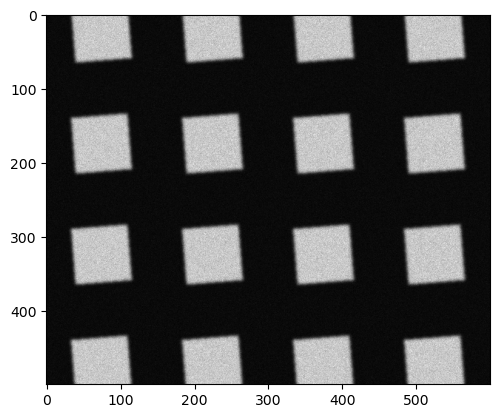

In [1]:
import numpy as np
import opticiq as iq
from opticiq import data
from matplotlib import pyplot as plt

I0 = data.demoS.slant
print('I0 shape %s, type %s, max %d' % (I0.shape, I0.dtype, I0.max()))
plt.imshow(I0, cmap='gray')

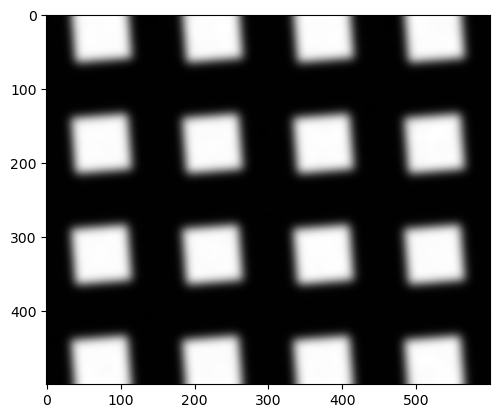

In [2]:
# run analysis recipe
imG, roi_vp, roi_vn, roi_hp, roi_hn = iq.recipe_slantedge(I0, 6)
# show the blurred version, note that noise is reduced and gradient zones increased
plt.imshow(imG['I1'], cmap='gray')

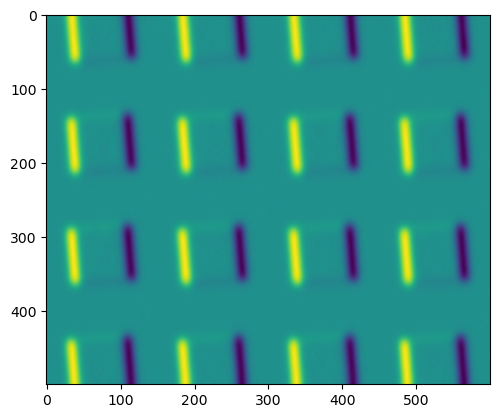

In [3]:
# show dI/dx of blurred
plt.imshow(imG['I_x'])

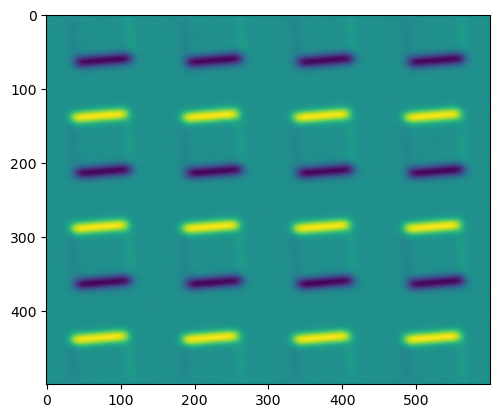

In [4]:
# show (dI/dy) of blurred
plt.imshow(imG['I_y'])

TODO
----
* Get ROI hulls, sort by area
* Rectangularize ROI hulls